# Bitfinex CryptoCurrencies

In [8]:
import bitfinex
import datetime
import time
 
# Create api instance of the v2 API
api_v2 = bitfinex.bitfinex_v2.api_v2()

No keys, only access to public API functions


In [9]:
def fetch_data(start, stop, symbol, interval, tick_limit, step):
    # Create api instance
    api_v2 = bitfinex.bitfinex_v2.api_v2()
    data = []
    start = start - step
    while start < stop:
        start = start + step
        end = start + step
        res = api_v2.candles(symbol=symbol, interval=interval,
                             limit=tick_limit, start=start,
                             end=end)
        data.extend(res)
        time.sleep(2)
    return data

In [10]:
# Set step size
time_step = 60000000

In [24]:
# Define query parameters
pair = 'btcusd' # Currency pair of interest
bin_size = '6m' # This will return minute data
limit = 1000    # We want the maximum of 1000 data points 

In [27]:
# Define the start date
t_start = datetime.datetime(2009, 1, 1, 0, 0)
t_start = time.mktime(t_start.timetuple()) * 1000

In [28]:
# Define the end date
t_stop = datetime.datetime(2019, 5, 1, 0, 0)
t_stop = time.mktime(t_stop.timetuple()) * 1000

In [29]:
pair_data = fetch_data(start=t_start, stop=t_stop, symbol=pair,
                       interval=bin_size, tick_limit=limit, 
                       step=time_step)

No keys, only access to public API functions


KeyboardInterrupt: 

In [ ]:
len(pair_data)

# Yahoo Finance - Stock Prices

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Define the instruments to download. We would like to see Nasdaq, Nikkei, SP500, ETF: SPDR, iShares MSCI Japan,MSCI UK, Germany
tickers = ['^IXIC', '^N225', '^GSPC', 'SPY', 'EWJ', 'EWU', 'EWG']

In [57]:
# We would like all available data from 01/01/1970 until 05/01/2019.
start_date = '1970-01-02'
end_date = '2019-05-01'

In [58]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [59]:
panel_data.head()

Attributes High                                       Low                     \
Symbols     EWJ EWU SPY      ^GSPC ^IXIC        ^N225 EWJ EWU SPY      ^GSPC   
Date                                                                           
1970-01-02  NaN NaN NaN  93.540001   NaN          NaN NaN NaN NaN  91.790001   
1970-01-05  NaN NaN NaN  94.250000   NaN  2402.850098 NaN NaN NaN  92.529999   
1970-01-06  NaN NaN NaN  93.809998   NaN  2406.219971 NaN NaN NaN  92.129997   
1970-01-07  NaN NaN NaN  93.379997   NaN  2394.959961 NaN NaN NaN  91.930000   
1970-01-08  NaN NaN NaN  93.470001   NaN  2283.679932 NaN NaN NaN  91.989998   

Attributes     ...      Volume                         Adj Close          \
Symbols        ...         SPY       ^GSPC ^IXIC ^N225       EWJ EWU SPY   
Date           ...                                                         
1970-01-02     ...         NaN   8050000.0   NaN   NaN       NaN NaN NaN   
1970-01-05     ...         NaN  11490000.0   NaN   0.0       NaN NaN NaN   
1970-01-06     ...         NaN  11460000.0   NaN   0.0       NaN NaN NaN   
1970-01-07     ...         NaN  10010000.0   NaN   0.0       NaN NaN NaN   
1970-01-08     ...         NaN  10670000.0   NaN   0.0       NaN NaN NaN   

Attributes                                
Symbols         ^GSPC ^IXIC        ^N225  
Date                                      
1970-01-02  93.000000   NaN          NaN  
1970-01-05  93.459999   NaN  2402.850098  
1970-01-06  92.820000   NaN  2406.219971  
1970-01-07  92.629997   NaN  2394.959961  
1970-01-08  92.680000   NaN  2283.679932  

[5 rows x 36 columns]

In [60]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

In [61]:
# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)


In [62]:
close.tail()

Symbols,EWJ,EWU,SPY,^GSPC,^IXIC,^N225
2019-04-25,54.900002,33.470001,292.049988,2926.169922,8118.680176,22307.580078
2019-04-26,55.400002,33.520000,293.410004,2939.879883,8146.399902,22258.730469
2019-04-29,55.619999,33.590000,293.869995,2943.030029,8161.850098,NaN
2019-04-30,55.419998,33.759998,294.019989,2945.830078,8095.390137,NaN
2019-05-01,55.230000,33.380001,291.809998,2923.729980,8049.640137,NaN


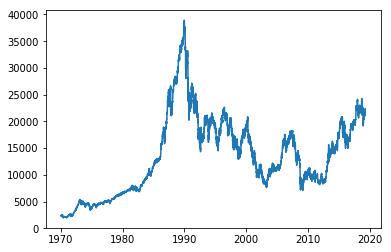

In [65]:
plt.plot(close['^N225'].dropna())

# USD
FX from FRED

In [30]:
# Define the instruments to download. We would like to see JPYUSD,CHYUSD, CADUSD, USDGBP, SKoreanUSD, MXNUSD,BRZUSD,USDAUS
tickers = ['DEXJPUS', 'DEXCHUS', 'DEXCAUS', 'DEXUSUK', 'DEXKOUS', 'DEXMXUS', 'DEXBZUS', 'DEXUSAL']

In [31]:
# We would like all available data from 01/01/1970 until 05/01/2019.
start_date = '1970-01-02'
end_date = '2019-05-01'

In [33]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'fred', start_date, end_date)

In [34]:
panel_data.head()

,DEXJPUS,DEXCHUS,DEXCAUS,DEXUSUK,DEXKOUS,DEXMXUS,DEXBZUS,DEXUSAL
DATE,,,,,,,,
1971-01-04,357.73,NaN,1.0109,2.3938,NaN,NaN,NaN,1.1127
1971-01-05,357.81,NaN,1.0102,2.3949,NaN,NaN,NaN,1.1132
1971-01-06,357.86,NaN,1.0106,2.3967,NaN,NaN,NaN,1.1140
1971-01-07,357.87,NaN,1.0148,2.3963,NaN,NaN,NaN,1.1138
1971-01-08,357.82,NaN,1.0154,2.3972,NaN,NaN,NaN,1.1124


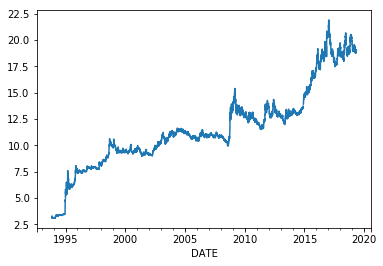

In [39]:
panel_data.DEXMXUS.plot()

# Quandl for General FX data


For minute-wise FX: https://github.com/philipperemy/FX-1-Minute-Data